## Notation

Here is a summary of some of the notation you will encounter.  

|General <br /> Notation| Description | Python (if applicable) |
|-------------------|----------------------------------------------------------------------------------------------------|-------------------------|
| $a$  | scalar, non bold | |
| $\mathbf{a}$  | vector, bold  | |
| $\mathbf{A}$ | matrix, bold capital   | |
| **Regression** |  |  |
|  $\mathbf{x}$  | Training Example feature values <img width=429/> | `x_train` | 
|  $\mathbf{y}$  | Training Example  targets  | `y_train` | 
|  $x^{(i)}$, $y^{(i)}$  | ith Training Example  | `x[i]`, `y[i]` |
|  $x_j$  | The value of jth Training feature  | `x[:,j]` |
|  ${x_j}^{(i)}$  | The value of the jth Training feature in the ith training example  | `x[i,j]` |
| m  | Number of training examples | `m` |
| n | Total number of features | `n`|
|  $w$ |  parameter: weight | `w` |
| $w_{(i)}$ | The ith weight of a multiple regression equation | `w_i`|
|  $b$ |  parameter: bias | `b` |
| $\alpha$ | The learning rate; which is usually a small number ($0 < \alpha < 1$) | `alpha` | 
| $\hat{y}^{(i)}$ | predicted target value | `y_pred` |   
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` |
|$\frac{\partial J(\mathbf{w},b)}{\partial w_j}$| the gradient or partial derivative of cost with respect to a parameter $w_j$ |    `dj_dw[j]`  | 
|   $\frac{\partial J(\mathbf{w},b)}{\partial b}$  | the gradient or partial derivative of cost with respect to a parameter $b$ | `dj_db`   |


# Supervised Machine Learning

## 1. Regression Model

### B. Multiple Linear Regression (different from multivariant regression)

The difference between univariant and multiple linear regressions is that: univariant has only one feature to train on (`x`), while multiple has more than one feature (`n`) to train the model on can be used as vector $\overrightarrow{x}$ consists of: `x_1`, `x_2`, ... , `x_n`. Each feature has its own weight multiplied to it. Therefore, the linear regression equation can be rewritten as:

$$f_{\overrightarrow{w},b}(\overrightarrow{x}) = {\overrightarrow{w}}\cdot{{\overrightarrow{x}}}+b$$

where as:

$$ \overrightarrow{x} = [x_1, x_2, ... , x_n] $$
$$ \overrightarrow{w} = [w_1, w_2, ... , w_n] $$

#### Vectorization

Instead of writing many equations and many terms or looping, we tend to use vectorized code, like $\overrightarrow{x}$ and $\overrightarrow{w}$ in the equations above. Vectorized code can be executed quicker and more computationally efficient on CPUs and GPUs. It is very common to use `NumPy` library in Python for vectorizing the code.

<figure>
    <center> <img src="./images/With and Withoud Vectorization.JPG"  style="width:900px;height:400px;" ></center>
</figure>

If we use a looping technique to work with a values, the values will be processed one after another (in series). This is much slower than dot product, which is being done on values in parallel. The difference in time actually appears in training on large datasets.

In [29]:
import numpy as np

w = np.array([1.0 , 2.5 , -3.3])
x = np.array([10 , 20 , 30])
b = 4

f = np.dot(w,x) + b         # Mathematical Dot Product

print(f)

-35.0


#### Cost Function

As before, the cost equation in multiple linear regression is:
$$J(\mathbf{\overrightarrow{w}},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{\overrightarrow{w}},b}(\mathbf{\overrightarrow{x}}^{(i)}) - y^{(i)})^2           \tag{1}$$
where:
$$ f_{\mathbf{\overrightarrow{w}},b}(\mathbf{\overrightarrow{x}}^{(i)}) = \mathbf{\overrightarrow{w}} \cdot \mathbf{\overrightarrow{x}}^{(i)} + b           \tag{2} $$ 

In [30]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

#### Gradient Descent

##### Gradient Descent for multiple variables math:

$$\begin{align*} \; \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{3}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously of gradients: 

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{4}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{5}
\end{align}
$$

* m is the number of training examples in the data set    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

##### Gradient Descent for multiple variables code implementation:

In [31]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

we construct a function to get the gradients, then use it to get the gradient descent as follows:

In [32]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later (extra part just to inspect values and steps)
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

########################################################################################## actual impelementation code body start    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
########################################################################################### actual impelementation code body end
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion and appending (saving) no more data into the lists to inspect
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10 to inspect too.
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

##### # Normal Equation

It is an equation used only for solving for $w$ and $b$ in linear regression, and does not generalize for other learning algorithms. It is slow when number of features is large (> 10000), therefore gradient descent is a more recommended method to get $w$ and $b$.

##### Learning Curve and Convergence of Gradient Descent

The learning curve is the curve representing the decrease or increase of the cost (error) value as more gradient descent iterations are done. Sometimes, this curve can, as well, show that gradient descent is not working.

<figure>
    <center> <img src="./images/Learning Curve.JPG"  style="width:550px;height:300px;" ></center>
</figure>

We can depend on automatice convergence test using $\epsilon = 0.001$ as the error base condition, whenever $error \leqslant \epsilon$ we should stop iterating. This way is better than and more efficient than setting an exact number of iteration. By declaring convergence, you declare finding the parameters $\overrightarrow{w}$ and $b$ to get the cost close to the global minimum.

##### Choosing Learning Rates

Choosing good learning rate ($\alpha$) is about avoiding divergence by using large $\alpha$, and computational inefficiency by using too small $\alpha$. You should try learning rates from 0.001 up to 1 (`[0.001 0.003 0.01 0.03 0.1 0.3 1]`). Problematic $\alpha$ can make learning curves like:
<figure>
    <center> <img src="./images/Learning Curves for Nonsuitable Learning Rates.JPG"  style="width:500px;height:125px;" ></center>
</figure>
The problem can be either a bug in the code, or a large learning rate. We need to shoot for the largest suitable learning rate $\alpha$, which is achieved through trial and error.

#### Feature Scaling

##### Feature Scaling on House price vs Number of Bedrooms and House Size in Feet

<figure>
    <center> <img src="./images/Feature Scaling_ House price vs bedrooms and size.JPG"  style="width:900px;height:400px;" ></center>
</figure>

We tend to scale the features we have because of the different ranges of the features we are having. Feature scaling is about scaling the values of features to a reasonable range for the model to work with, resulting higher accuracy. In the example above are two graphs (scatter and contour plots) before and after the feature scaling.

##### Ranges and Feature Scaling:

$$\begin{align*} \;
-1 \leqslant x \leqslant 1              \; & \text{ ---> Ideal}  \newline
-3 \leqslant x \leqslant 3              \; & \text{ ---> acceptable range, no rescaling}  \newline
-0.3 \leqslant x \leqslant 0.3          \; & \text{ ---> acceptable range, no rescaling}  \newline
0 \leqslant x \leqslant 3               \; & \text{ ---> okay range, no rescaling}  \newline
-2 \leqslant x \leqslant 0.5            \; & \text{ ---> okay range, no rescaling}  \newline
-100 \leqslant x \leqslant 100          \; & \text{ ---> large range, rescale}  \newline
-0.001 \leqslant x \leqslant 0.001      \; & \text{ ---> small range, rescale}  \newline
98.6 \leqslant x \leqslant 105          \; & \text{ ---> okay range, but large values, rescale}  \newline
\newline \end{align*}$$


##### Types of Feature Scaling:

There are many feature scaling techniques; such as:
1.  Feature Scaling $0 \leqslant x \leqslant 1$:    $$x_{i,scaled} = \frac{x_i}{max}$$
2.  Mean Normalization $-1 \leqslant x \leqslant 1$:    $$x_{i,scaled} = \frac{x_i - \mu_i}{max - min}$$
3.  Z-Score Normalization $50\% \leqslant 0$ and $ 50\% \geqslant 0$:    $$x_{i,scaled} = \frac{x_i - \mu_i}{\sigma_i}$$
where:
* $\mu$ is the mean of the data `np.mean()`.
* $\sigma$ is the standard deviation of the data `np.std()`.

#### Feature Engineering

Feature Engineering is about using intuition and experties to design new feature(s), by transforming or combining original features. This newly designed feature should be given a weight ($w_i$) of its own, then participate in training the model. This process can result in more accurate models.

## C. Polynomial Regression

Sometimes, the data can be predicted better if the model is a curve or a quadratic function. We can feature engineer new feature(s) of an original feature squared, cubed or even square rooted. The new feature(s) will then be scaled along with the original one, and have their own weight(s), then using gradient descent to fit this curve to the data.

<figure>
    <left> <img src="./images/Polynomial regression_1.JPG"  style="width:500px;height:260px;" ></left>
    <right> <img src="./images/Polynomial regression_2.JPG"  style="width:500px;height:260px;" ></right>
</figure>

#The question "What features to use?" will be answered in the next course

### Scikit-Learn

Scikit-Learn is a machine learning library in python that contains many machine learning functions for quick modeling. It does play a very important role in machine learning modelling nowadays.

Scikit-learn has a gradient descent regression model [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  Like your previous implementation of gradient descent, this model performs best with normalized inputs. [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) will perform z-score normalization as in a previous lab. Here it is referred to as 'standard score'.

#### Coding Example of using Scikit-Learn for Univariant linear Regression Modelling with Stochastic Gradient Descent:

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data

In [34]:
# Load the dataset
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

In [35]:
# Scale/Normalize the training data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


In [36]:
# Create and fit the regression model
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 115, number of weight updates: 11386.0


In [37]:
# View parameters
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print("model parameters:")
print(f"    w: {w_norm} ,")
print(f"    b:{b_norm}")

model parameters:
    w: [109.99 -20.97 -32.37 -38.08] ,
    b:[363.16]


In [38]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match:   {(y_pred == y_pred_sgd).all()}")
print()
print(f"Prediction on training set:\n{y_pred[:4]}" )
print()
print(f"Target values:\n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match:   True

Prediction on training set:
[295.18 485.88 389.63 492.04]

Target values:
[300.  509.8 394.  540. ]


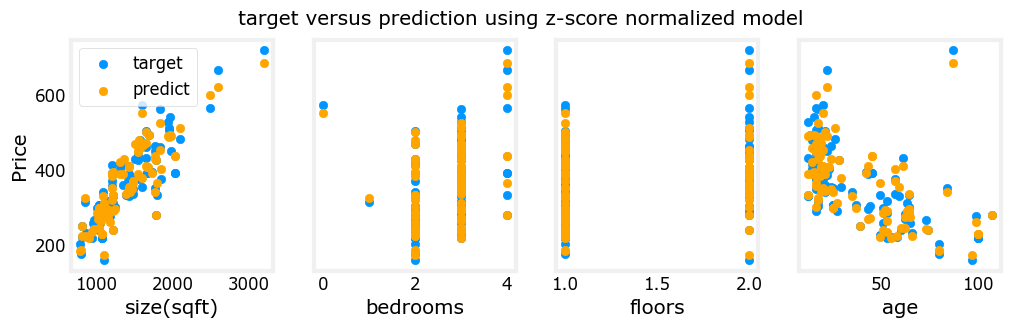

In [39]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

#### Coding Example of using Scikit-Learn for Multiple linear Regression Modelling with Stochastic Gradient Descent:

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from lab_utils_multi import load_house_data

In [41]:
# Defining Data
X_train = np.array([1.0, 2.0])   #features
y_train = np.array([300, 500])   #target value

In [42]:
# Creating and Fitting the model
linear_model = LinearRegression()
# X must be a 2-D Matrix
linear_model.fit(X_train.reshape(-1, 1), y_train) 

LinearRegression()

In [43]:
# Viewing Parameters
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")
print(f"'manual' prediction: f_wb = wx+b : {1200*w + b}")

w = [200.], b = 100.00
'manual' prediction: f_wb = wx+b : [240100.]


In [44]:
# Making Predictions
y_pred = linear_model.predict(X_train.reshape(-1, 1))
print("Prediction on training set:", y_pred)
X_test = np.array([[1200]])
print(f"Prediction for 1200 sqft house: ${linear_model.predict(X_test)[0]:0.2f}")

Prediction on training set: [300. 500.]
Prediction for 1200 sqft house: $240100.00


In [45]:
# load the dataset
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

In [46]:
# Creating and Fitting the Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 

LinearRegression()

The $\mathbf{w}$ and $\mathbf{b}$ parameters are referred to as 'coefficients' and 'intercept' in scikit-learn.

In [47]:
# Viewing Parameters
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")

w = [  0.27 -32.62 -67.25  -1.47], b = 220.42


In [48]:
print(f"Prediction on training set:\n {linear_model.predict(X_train)[:4]}" )
print(f"prediction using w,b:\n {(X_train @ w + b)[:4]}")
print(f"Target values \n {y_train[:4]}")
print()
x_house = np.array([1200, 3,1, 40]).reshape(-1,4)
x_house_predict = linear_model.predict(x_house)[0]
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.2f}")

Prediction on training set:
 [295.18 485.98 389.52 492.15]
prediction using w,b:
 [295.18 485.98 389.52 492.15]
Target values 
 [300.  509.8 394.  540. ]

 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318709.09
